conda create --name myproject python=3.9
conda activate myproject
conda install numpy matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

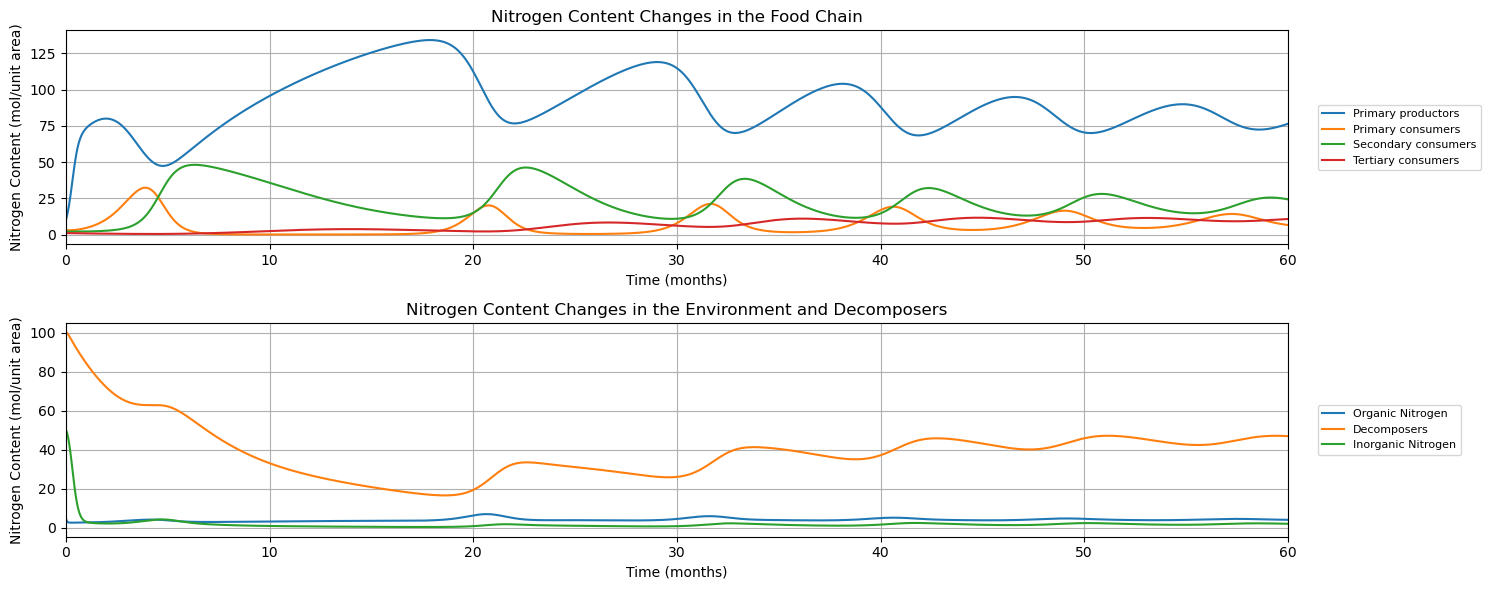

In [ ]:
# Figure 5. The result of FENCM

# Define parameters
k = 3  # number of trophic levels
r = 0.1  # Increased growth rate (was 0.15)
gamma = np.array([0.01, 0.2, 0.05, 0.3])  # Decreased death rate for N0 (was 0.05)
alpha = np.array([0.02, 0.05, 0.03])  # Decreased predation rate on N0 (was 0.25)
beta = np.array([0.015, 0.04, 0.015])  # conversion efficiency
d = 0.2  # decomposition rate
delta = 0.12  # decomposer conversion efficiency
gamma_D = 0.5  # decomposer death rate

# Time parameters
t_max = 60
dt = 0.01 
t = np.arange(0, t_max, dt)
n_steps = len(t)

# Initialize arrays for storing results
N = np.zeros((k+1, n_steps))
N_org = np.zeros(n_steps)
N_D = np.zeros(n_steps)
N_inorg = np.zeros(n_steps)

# Initial conditions
N[:, 0] = [10, 3, 2, 1]
N_org[0] = 5
N_D[0] = 100
N_inorg[0] = 50

# Euler method for solving the system
for i in range(n_steps-1):
    # Trophic levels
    N[0, i+1] = N[0, i] + dt * (r * N_inorg[i] * N[0, i] - gamma[0] * N[0, i] - alpha[0] * N[0, i] * N[1, i])
    
    for j in range(1, k):
        N[j, i+1] = N[j, i] + dt * (beta[j-1] * N[j-1, i] * N[j, i] - gamma[j] * N[j, i] - 
                                   alpha[j] * N[j, i] * N[j+1, i])
    
    N[k, i+1] = N[k, i] + dt * (beta[k-1] * N[k-1, i] * N[k, i] - gamma[k] * N[k, i])
    
    # Organic nitrogen
    transfer_sum = sum((alpha[j] - beta[j]) * N[j, i] * N[j+1, i] for j in range(k))
    mortality_sum = sum(gamma[j] * N[j, i] for j in range(k+1))
    
    N_org[i+1] = N_org[i] + dt * (transfer_sum + mortality_sum + gamma_D * N_D[i] - d * N_D[i] * N_org[i])
    
    # Decomposers
    N_D[i+1] = N_D[i] + dt * (delta * N_D[i] * N_org[i] - gamma_D * N_D[i])
    
    # Inorganic nitrogen
    N_inorg[i+1] = N_inorg[i] + dt * ((d - delta) * N_D[i] * N_org[i] - r * N_inorg[i] * N[0, i])


plt.figure(figsize=(15, 6))

# 绘制营养级
# plot trophic levels
plt.subplot(2, 1, 1)
plt.xlim(0, t_max)  # Limit x-axis to actual data range

plt.plot(t, N[0], label=f'Primary productors')
plt.plot(t, N[1], label=f'Primary consumers')
plt.plot(t, N[2], label=f'Secondary consumers')
plt.plot(t, N[3], label=f'Tertiary consumers')
plt.title('Nitrogen Content Changes in the Food Chain')
plt.xlabel('Time (months)')
plt.ylabel('Nitrogen Content (mol/unit area)')
plt.legend(fontsize=8, loc='center left', bbox_to_anchor=(1.02, 0.5))  # Position legend outside plot
plt.grid(True)

# 将有机氮、分解者和无机氮绘制在同一个图中
# plot organic nitrogen, decomposers, and inorganic nitrogen
plt.subplot(2, 1, 2)
plt.xlim(0, t_max)  # Limit x-axis to actual data range
plt.plot(t, N_org, label='Organic Nitrogen')
plt.plot(t, N_D, label='Decomposers')
plt.plot(t, N_inorg, label='Inorganic Nitrogen')
plt.title('Nitrogen Content Changes in the Environment and Decomposers')
plt.xlabel('Time (months)')
plt.ylabel('Nitrogen Content (mol/unit area)')
plt.legend(fontsize=8, loc='center left', bbox_to_anchor=(1.02, 0.5))  # Position legend outside plot
plt.grid(True)

plt.tight_layout()
plt.show()
